In [1]:
import psycopg2
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


# Tell MatPlotLib to draw plots inline with the code outputs
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

conn = psycopg2.connect( 
                        host = 'project.cgxhdwn5zb5t.us-east-1.rds.amazonaws.com',
                        port = 5432, 
                        user = 'postgres',
                        password = 'Admin123',
                        database = 'postgres')
cursor = conn.cursor()

In [2]:
DEC2FLOAT = psycopg2.extensions.new_type(
    psycopg2.extensions.DECIMAL.values,
    'DEC2FLOAT',
    lambda value, curs: float(value) if value is not None else None)
psycopg2.extensions.register_type(DEC2FLOAT)

In [3]:
cursor.execute('SELECT * FROM household_181')
rows = cursor.fetchall()
col_names = []
for elt in cursor.description:
    col_names.append(elt[0])

df = pd.DataFrame(data=rows, columns=col_names )

In [4]:
df.head()

,control,omb13cbsa,division,intstatus,intmonth,intlang,intmode,permnear,vacresdays,vacrntdays,...,rmjob,rmownhh,rmfamily,rmchange,rmcommute,rmhome,rmcosts,rmhood,rmother,year
0,11055748.0,99998.0,4.0,1.0,5.0,1.0,2.0,-6.0,-6.0,-6.0,...,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,2015
1,11055773.0,99998.0,7.0,1.0,8.0,1.0,2.0,-6.0,-6.0,-6.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,2015
2,11055773.0,99998.0,7.0,1.0,8.0,-9.0,-9.0,-6.0,-6.0,-6.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,2017
3,11056107.0,99999.0,5.0,1.0,5.0,1.0,2.0,-6.0,-6.0,-6.0,...,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,2015
4,11056107.0,99999.0,5.0,1.0,7.0,1.0,2.0,-6.0,-6.0,-6.0,...,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,2017


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136245 entries, 0 to 136244
Columns: 182 entries, control to year
dtypes: float64(181), object(1)
memory usage: 189.2+ MB


In [6]:
df.describe()

,control,omb13cbsa,division,intstatus,intmonth,intlang,intmode,permnear,vacresdays,vacrntdays,...,movforce,rmjob,rmownhh,rmfamily,rmchange,rmcommute,rmhome,rmcosts,rmhood,rmother
count,1.362450e+05,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,...,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000
mean,1.104325e+07,62040.862857,5.478014,1.245829,7.039422,0.586686,1.165973,-5.759257,-5.748776,-5.775280,...,-4.383104,-4.514646,-4.547917,-4.529216,-4.515535,-4.509597,-4.554347,-4.524151,-4.551088,-4.524247
std,2.483225e+04,35455.723682,2.556581,0.645094,1.409371,2.328762,2.370249,1.421780,1.559736,1.386489,...,3.260303,3.139458,3.076451,3.112814,3.139171,3.150524,3.064042,3.124800,3.074021,3.123453
min,1.100000e+07,12060.000000,1.000000,1.000000,4.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.102171e+07,31080.000000,3.000000,1.000000,6.000000,1.000000,1.000000,-6.000000,-6.000000,-6.000000,...,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000
50%,1.104339e+07,42660.000000,5.000000,1.000000,7.000000,1.000000,2.000000,-6.000000,-6.000000,-6.000000,...,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000
75%,1.106477e+07,99998.000000,8.000000,1.000000,8.000000,1.000000,2.000000,-6.000000,-6.000000,-6.000000,...,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000
max,1.108703e+07,99999.000000,9.000000,3.000000,10.000000,10.000000,2.000000,2.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
df.shape

(136245, 182)

In [8]:
# Use pandas to count the number of each unique value for each state.
neighbor_g = df.groupby('omb13cbsa')[['ratingnh']].count()
neighbor_g = neighbor_g.sort_values('ratingnh')
neighbor_g

,ratingnh
omb13cbsa,
14460.0,4274
37980.0,4630
35620.0,4635
12060.0,4725
16980.0,4769
41860.0,4788
38060.0,4886
19820.0,4912
42660.0,5006


In [9]:
# need help?? metro = df_neighbor[(df_neighbor['omb13cbsa'] == 99999) or (df_neighbor['omb13cbsa'] == 99998)]

In [10]:
#Unique Neighborhood Rating
df.ratingnh.unique()

array([10.,  7., -9.,  8.,  4.,  9.,  3.,  6.,  5.,  2.,  1., -6.])

In [11]:
# Get names of indexes for which column ratingnh has value less than 0
indexNames = df[ df['ratingnh'] < 0 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [12]:
#Average Neighborhood rating
df['ratingnh'].mean()

8.157293428073281

# Visualization


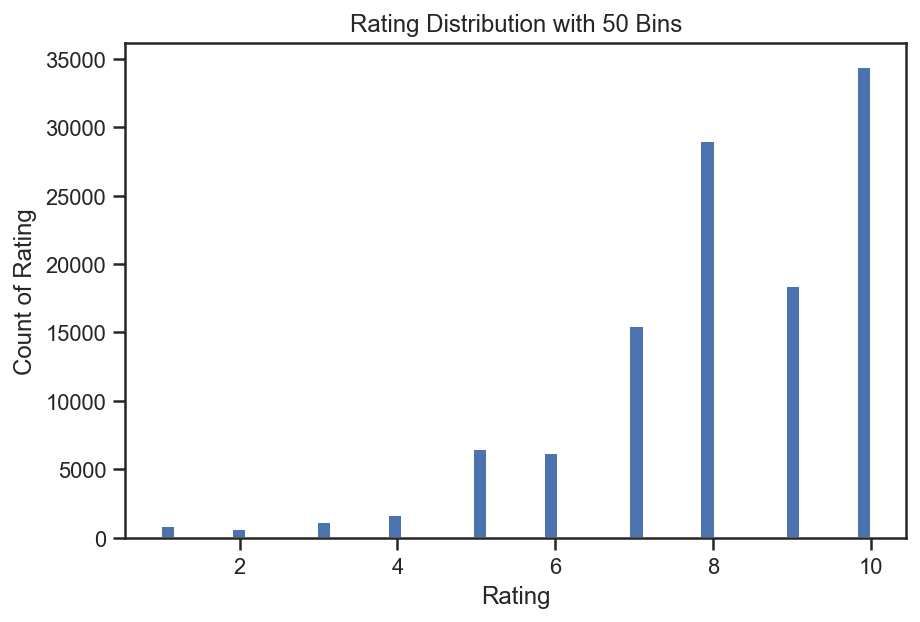

In [13]:
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(212)
ax.hist(df['ratingnh'], bins=50, range=(df['ratingnh'].min(),df['ratingnh'].max()))
plt.title('Rating Distribution with 50 Bins')
plt.xlabel('Rating')
plt.ylabel('Count of Rating')
plt.show()

In [14]:
df.ratingnh.unique()

array([10.,  7.,  8.,  4.,  9.,  3.,  6.,  5.,  2.,  1.])

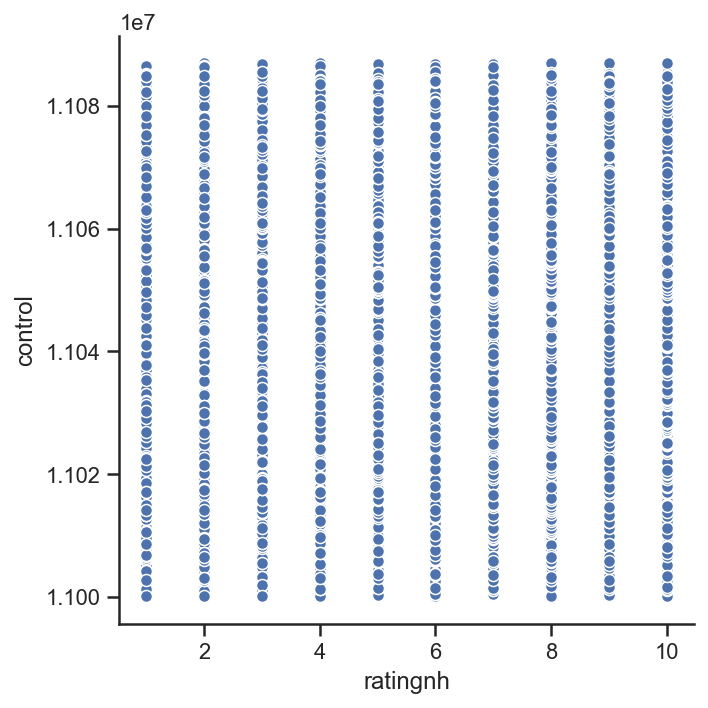

In [15]:
#Nation-wide distribution of Satisfaction levels for NEIGHBORHOOD?
sns.relplot(x="ratingnh", y='control',data=df)

In [16]:
#filter on 47900: Washington-Arlington-Alexandria, DC-VA-MD-WV|| states only
dmv = df[(df['omb13cbsa'] == 47900)]

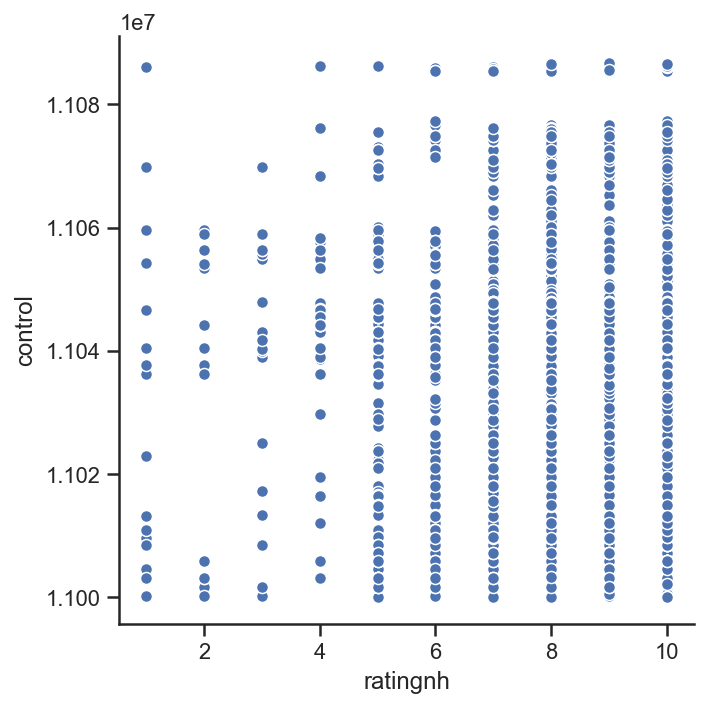

In [17]:
#DMV wide distribution of Satisfaction levels for NEIGHBORHOOD?
sns.relplot(x="ratingnh", y="control", data=dmv)

In [18]:
df.omb13cbsa.unique()

array([99998., 99999., 31080., 19100., 47900., 19820., 35620., 40140.,
       26420., 12060., 41860., 33100., 16980., 37980., 14460., 38060.,
       42660.])

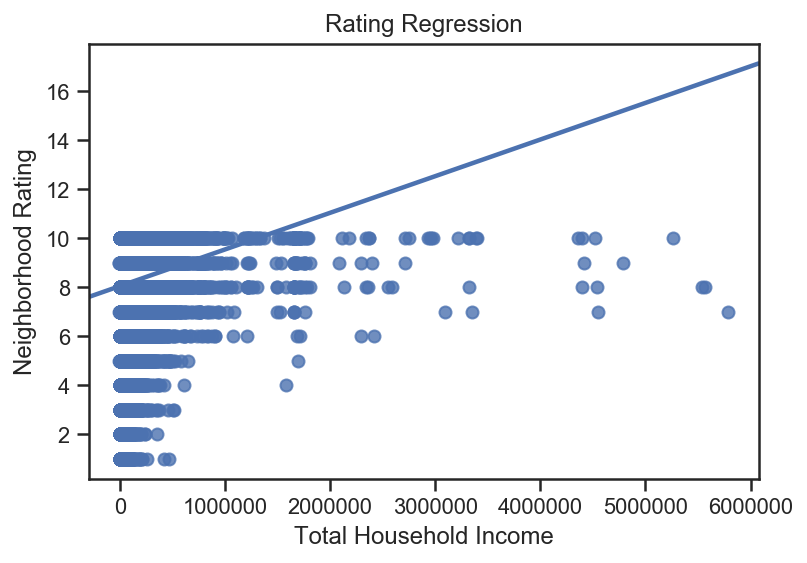

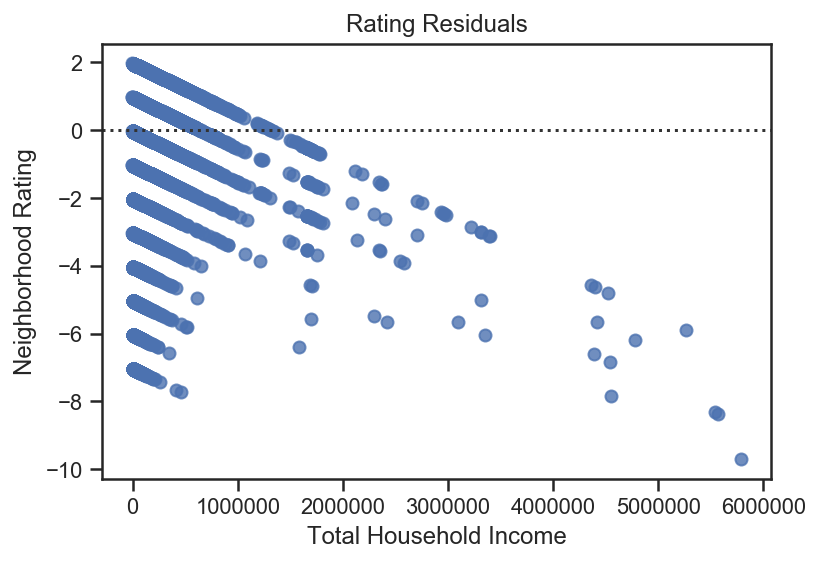

In [19]:
#Regression and Residual plot between total household income and neigborhood rating

#tips = sns.load_dataset("ratingnh")
sns.regplot(x="hincp", y="ratingnh", data=df, ci=None)
plt.title("Rating Regression")
plt.xlabel('Total Household Income', size=12)
plt.ylabel('Neighborhood Rating', size=12)
plt.show()

sns.residplot(x="hincp", y="ratingnh", data=df)
plt.title("Rating Residuals")
plt.xlabel('Total Household Income', size=12)
plt.ylabel('Neighborhood Rating', size=12)
plt.show()

In [20]:
# Label the state names
LABEL_MAP = {
    12060: "GA",
    12580: "MD",
    13820: "AL",
    14460: "MA-NH",
    16980: "IL-IN-WI",
    17140: "OH-KY-IN",
    17460: "OH",
    19100: "TX",
    19740: "CO",
    19820: "MI",
    26420: "TX",
    28140: "MO-KS",
    29820: "NV",
    31080: "CA",
    32820: "TN-MS-AR",
    33100: "FL",
    33340: "WI",
    33460: "MN-WI",
    35380: "LA",
    35620: "NY-NJ-PA",
    36420: "OK",
    37980: "PA-NJ-DE-MD",
    38060: "AZ",
    38300: "PA",
    38900: "OR-WA",
    39580: "NC",
    40060: "VA",
    40140: "CA",
    40380: "NY",
    41700: "TX",
    41860: "San Francisco, CA",
    41940: "San Jose-Sunnyvale-Santa Clara, CA",
    42660: "WA",
    45300: "Tampa-St. Petersburg-Clearwater, FL",
    47900: "DC-VA-MD-WV",
    99998: "All other metropolitan areas",
    99999: "Not in a metropolitan area"
}

In [21]:
## Convert state column labels into text
df["omb13cbsa"] = df["omb13cbsa"].map(LABEL_MAP)
df["omb13cbsa"]

0         All other metropolitan areas
1         All other metropolitan areas
3           Not in a metropolitan area
4           Not in a metropolitan area
5         All other metropolitan areas
                      ...             
136240      Not in a metropolitan area
136241    All other metropolitan areas
136242    All other metropolitan areas
136243    All other metropolitan areas
136244    All other metropolitan areas
Name: omb13cbsa, Length: 114137, dtype: object

KeyboardInterrupt: 

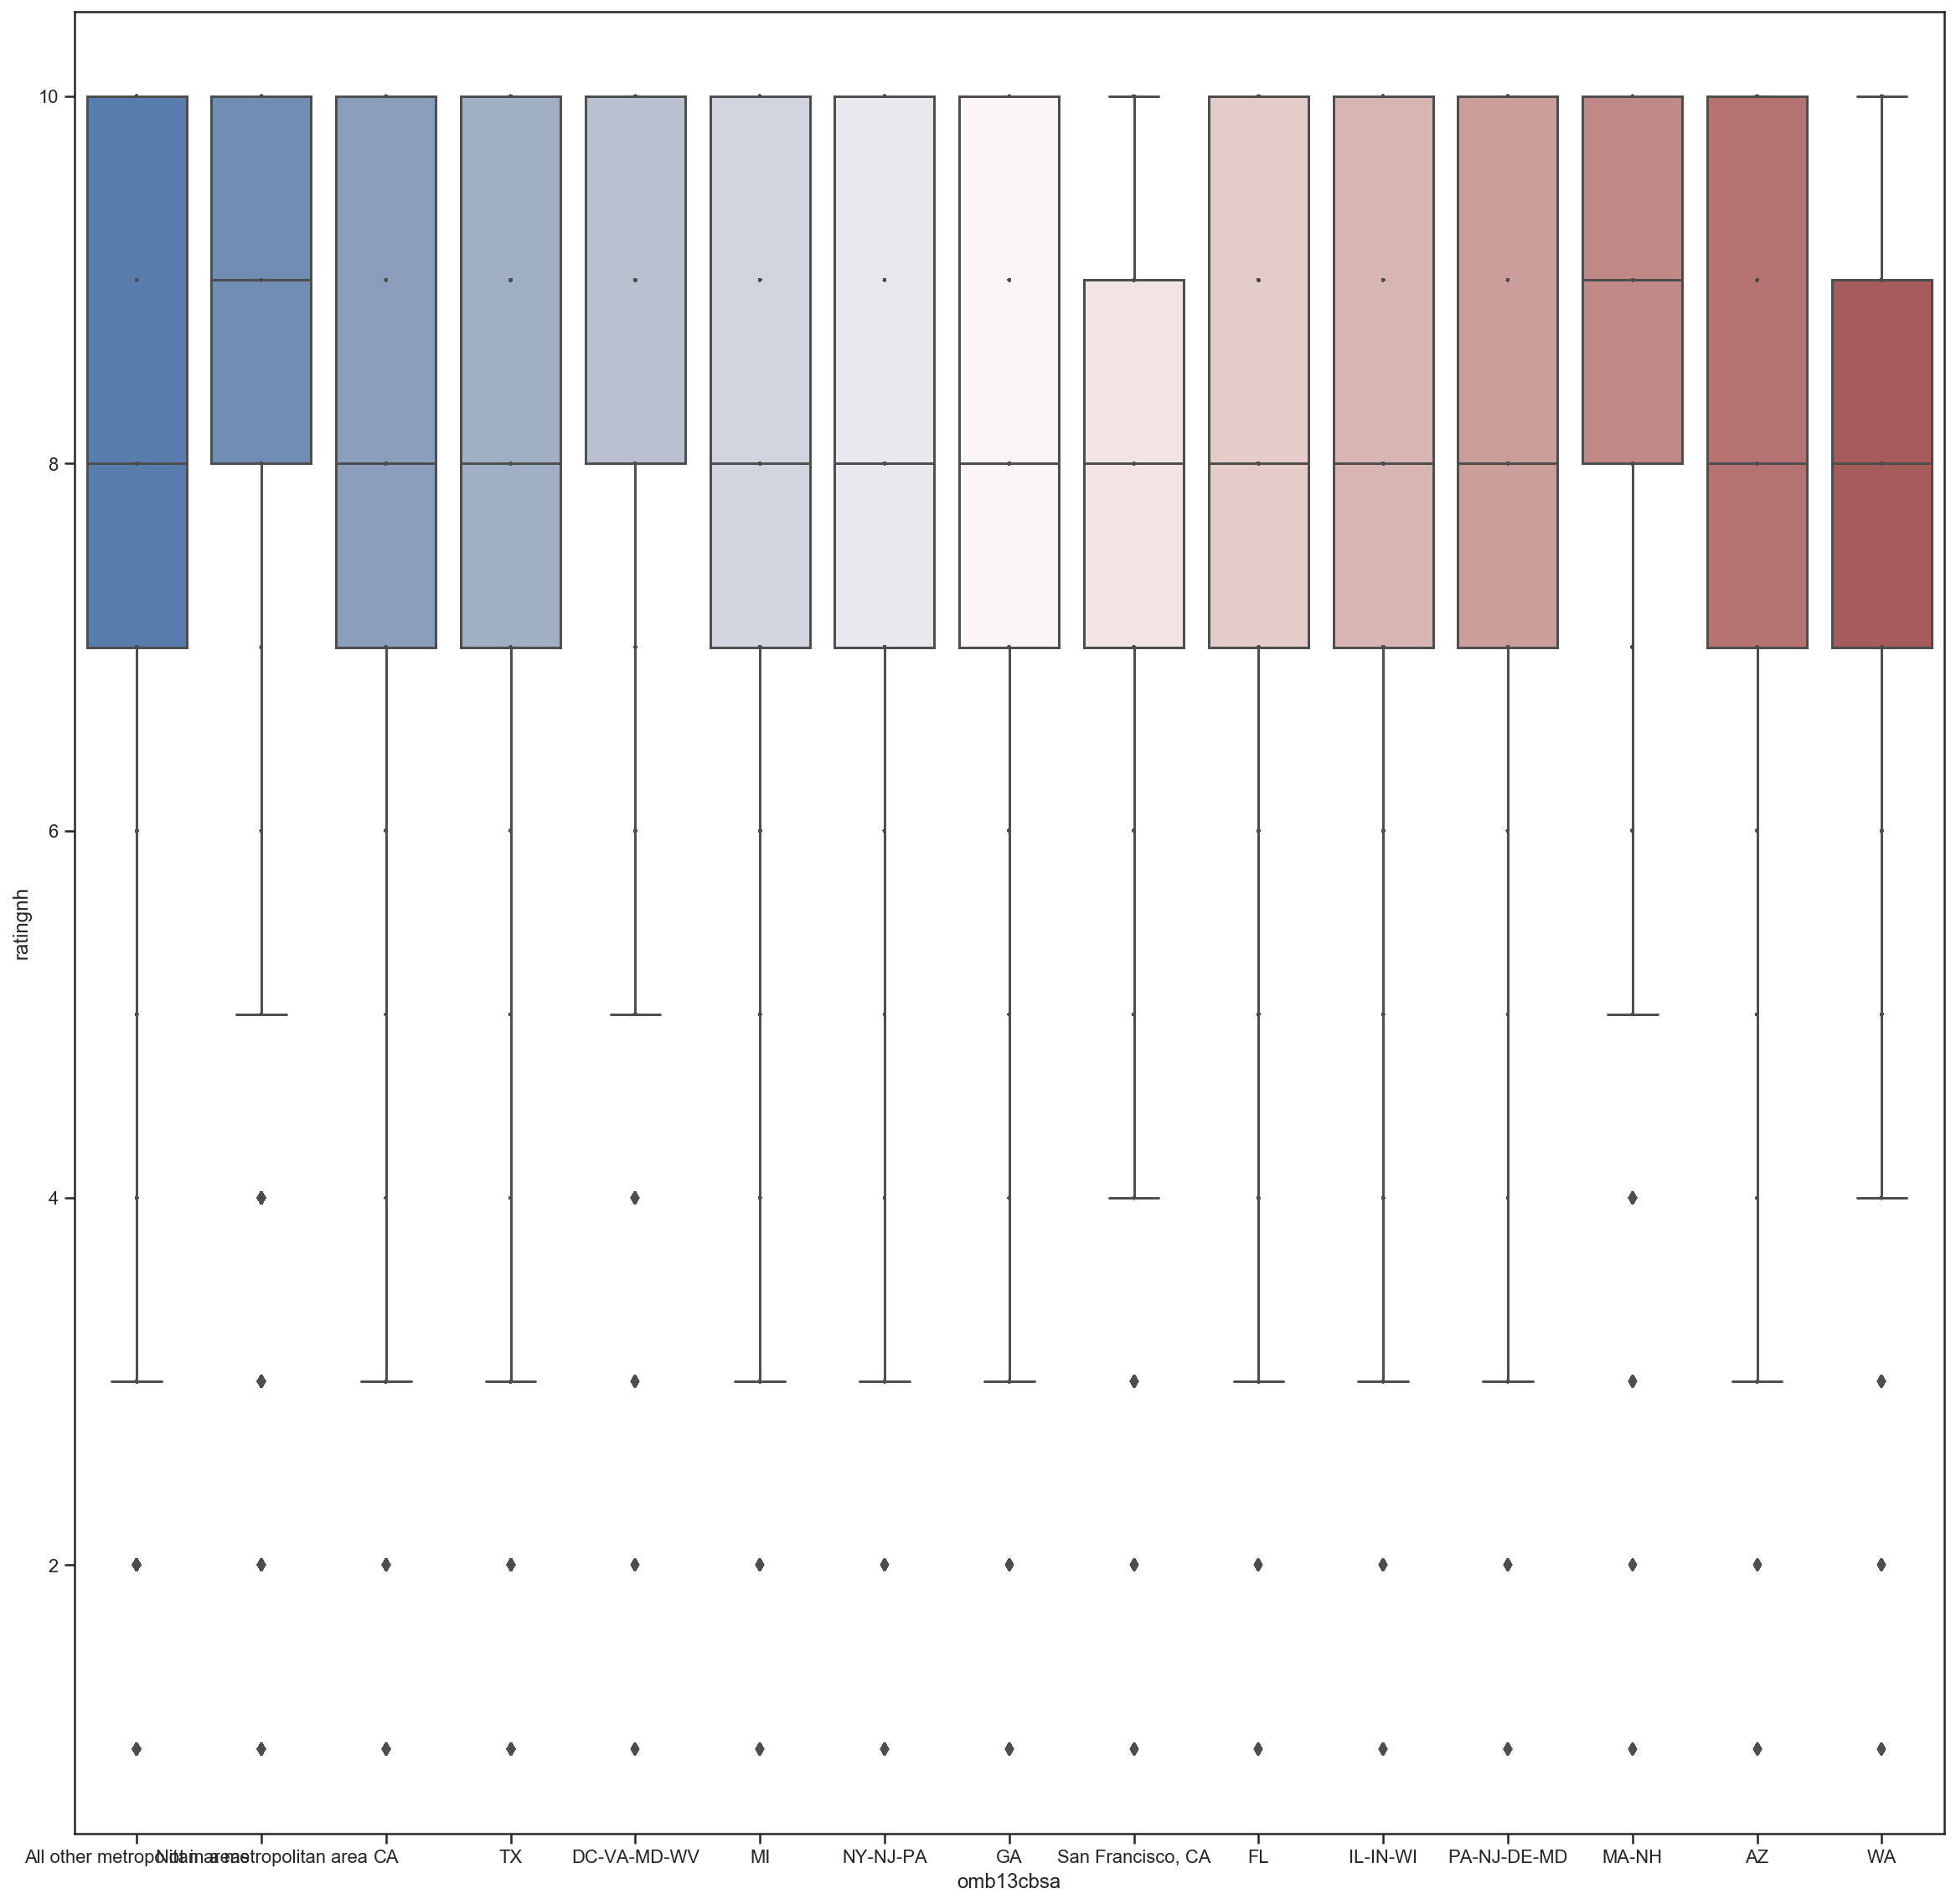

In [22]:
f, ax = plt.subplots(figsize=(20,20))
sns.boxplot(x='omb13cbsa', y='ratingnh', data=df, palette='vlag')
sns.swarmplot(x='omb13cbsa', y='ratingnh', data=df, size=2, color='0.3')
plt.title('Rating By State', size=14)
plt.xlabel('State', size=12)
plt.ylabel('Rating', size=12)
plt.show()